This is a **private notebook** to have some visualization in the **Shell.ai Hackathon 2023**. **Important, do not publish this notebook or its results anywhere, for private use only**.

# 1. Data loading

In [1]:
!pip install basemap --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
# Imports
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import date, timedelta
import folium
import folium.plugins
import matplotlib.pyplot as plt
from matplotlib import colors, animation
from mpl_toolkits.basemap import Basemap
import plotly.express as px
from IPython.display import HTML
from branca.colormap import linear
import plotly.graph_objects as go

# GUJARAT center coordinates 22.6708° N, 71.5724° E
GUJARAT_CENTER_LAT = 22.6708
GUJARAT_CENTER_LON = 71.5724

In [3]:
# Load csv data
biomass_history_df = pd.read_csv('/kaggle/input/biomass-history/Biomass_History.csv')
biomass_history_df

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885
...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,20.15456,72.84432,5.199882,4.516778,4.321080,2.658953,5.113997,5.301668,6.419223,5.321604
2414,2414,20.15456,72.92394,0.122287,0.126717,0.101494,0.111509,0.121749,0.122467,0.145785,0.120626
2415,2415,20.15456,73.00357,0.039415,0.040843,0.032713,0.035941,0.039241,0.039473,0.046989,0.038879
2416,2416,20.15456,73.08319,2.719220,1.370163,0.818687,1.205721,1.316443,1.324201,1.576338,1.304297


In [4]:
# Some data formating
biomass_df = pd.DataFrame(columns=['map_index', 'lat', 'lon', 'year', 'biomass'])
biomass_df
years = [str(x) for x in list(np.arange(2010, 2018))]
for idx, row in biomass_history_df.iterrows():
    for year in years:
        biomass_df = pd.concat([biomass_df, pd.DataFrame(data=[[int(row['Index']), row['Latitude'], 
                                                                row['Longitude'], year, row[year]]],
                                                         columns=['map_index', 'lat', 'lon', 'year', 'biomass'])])
biomass_df

,map_index,lat,lon,year,biomass
0,0,24.66818,71.33144,2010,8.475744
0,0,24.66818,71.33144,2011,8.868568
0,0,24.66818,71.33144,2012,9.202181
0,0,24.66818,71.33144,2013,6.023070
0,0,24.66818,71.33144,2014,10.788374
...,...,...,...,...,...
0,2417,20.15456,73.16282,2013,0.209801
0,2417,20.15456,73.16282,2014,0.229067
0,2417,20.15456,73.16282,2015,0.230417
0,2417,20.15456,73.16282,2016,0.274289


# 2. Map visualization

In [5]:
# Plot animated map for the time series
# Source: https://stackoverflow.com/questions/60366358/animate-a-plotly-map-with-a-sliding-date-bar
fig = px.density_mapbox(biomass_df,
                        lat=biomass_df['lat'],
                        lon=biomass_df['lon'],
                        z=biomass_df['biomass'],
                        radius=10,
                        animation_frame='year',
                        range_color=(0, 1300)
                        )
fig.update_layout(mapbox_style='carto-positron', mapbox_zoom=6, mapbox_center = {'lat': GUJARAT_CENTER_LAT, 'lon': GUJARAT_CENTER_LON},)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 600
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 600
fig.layout.coloraxis.showscale = True
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10

fig.show()

In [6]:
# Plot animated map showing the map index
# Source: https://stackoverflow.com/questions/60366358/animate-a-plotly-map-with-a-sliding-date-bar
fig = px.density_mapbox(biomass_df, 
                        lat=biomass_df['lat'], 
                        lon=biomass_df['lon'], 
                        z=biomass_df['map_index'],
                        radius=10,
                        animation_frame='year',
                        range_color=(0, 2500)
                        )
fig.update_layout(mapbox_style='carto-positron', mapbox_zoom=6, mapbox_center = {'lat': GUJARAT_CENTER_LAT, 'lon': GUJARAT_CENTER_LON},)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 600
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 600
fig.layout.coloraxis.showscale = True
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10

fig.show()

In [7]:
biomass_df[biomass_df['year'] == '2010']

,map_index,lat,lon,year,biomass
0,0,24.66818,71.33144,2010,8.475744
0,1,24.66818,71.41106,2010,24.029778
0,2,24.66818,71.49069,2010,44.831635
0,3,24.66818,71.57031,2010,59.974419
0,4,24.66818,71.64994,2010,14.653370
...,...,...,...,...,...
0,2413,20.15456,72.84432,2010,5.199882
0,2414,20.15456,72.92394,2010,0.122287
0,2415,20.15456,73.00357,2010,0.039415
0,2416,20.15456,73.08319,2010,2.719220


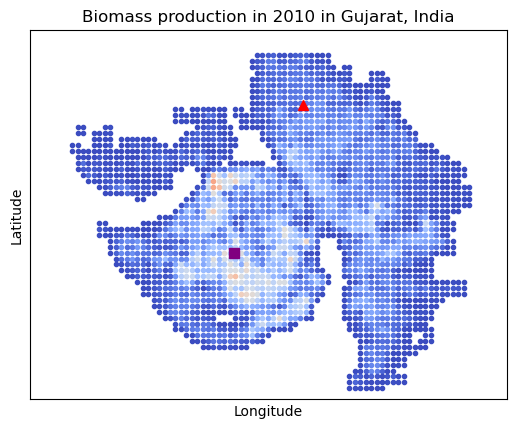

In [8]:
# Setup the Basemap
map = Basemap(projection='merc', llcrnrlon=68, llcrnrlat=20,
              urcrnrlon=75, urcrnrlat=25, resolution='l')

# Plotting the cells with color scale
norm = colors.Normalize(vmin=min(biomass_df['biomass']), vmax=max(biomass_df['biomass']))
cmap = plt.colormaps['coolwarm']

for idx, row in biomass_df[biomass_df['year'] == '2010'].iterrows():
    x, y = map(row['lon'], row['lat'])
    color = cmap(norm(row['biomass']))
    map.plot(x, y, 'o', color=color, markersize=3)
    #plt.text(x, y, str(row['biomass']), ha='center', va='bottom')
        
# Draw coastlines and countries
#map.drawcoastlines()
#map.readshapefile('gadm36_IND_1', 'india', drawbounds=True, color='gray')

# Draw random markers on the map (example)
# Convert the latitude and longitude coordinates of the markers to x and y coordinates
triangle_lat, triangle_lon = 24.000, 72.000
square_lat, square_lon = 22.000, 71.000

triangle_x, triangle_y = map(triangle_lon, triangle_lat)
square_x, square_y = map(square_lon, square_lat)

# Plot the red triangle and the purple square markers
map.plot(triangle_x, triangle_y, '^', markersize=7, color='red')
map.plot(square_x, square_y, 's', markersize=7, color='purple')


# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biomass production in 2010 in Gujarat, India')

# Show the plot
plt.show()

In [9]:
# Setup the Basemap for Gujarat
base_map = Basemap(projection='merc', llcrnrlon=68, llcrnrlat=20,
                   urcrnrlon=75, urcrnrlat=25, resolution='l')

# Extract years and cell values
years = sorted(list(biomass_df['year'].unique()))
biomass_min = min(biomass_df['biomass'])
biomass_max = max(biomass_df['biomass'])

# Create the figure and axes
fig, ax = plt.subplots()

# Plotting the initial cells
scatter = ax.scatter([], [], s=10, c=[], cmap='coolwarm', vmin=biomass_min, vmax=biomass_max)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Biomass production in year ' + year +  ' Gujarat, India')

# Prepare longitudes and latitudes for the plot ticks
longitudes = sorted(list(biomass_df['lon'].round(decimals=2).unique()))
selected_lons = list(np.linspace(min(longitudes), max(longitudes), 8).round(2))
latitudes = sorted(list(biomass_df['lat'].round(decimals=2).unique()))
selected_lats = list(np.linspace(min(latitudes), max(latitudes), 8).round(2))
# Set x-axis ticks and labels as longitude values
ax.set_xticks([base_map(lon, latitudes[0])[0] for lon in selected_lons])
ax.set_xticklabels(selected_lons)
# Set y-axis ticks and labels as latitude values
ax.set_yticks([base_map(longitudes[0], lat)[1] for lat in selected_lats])
ax.set_yticklabels(selected_lats)

# Draw coastlines and state boundary
# map.drawcoastlines()
# map.readshapefile('gadm36_IND_1', 'india', drawbounds=True, color='gray')

# Add color scale
cbar = plt.colorbar(scatter)
cbar.set_label('Biomass production')

# Update function for animation
def update(frame):
    #ax.clear()
    # Plotting the updated cells
    year = years[frame]
    biomass_year_df = biomass_df[biomass_df['year'] == year]
    x, y = base_map(biomass_year_df['lon'], biomass_year_df['lat'])
    scatter = ax.scatter(x, y, s=10, c=biomass_year_df['biomass'], cmap='coolwarm', vmin=biomass_min, vmax=biomass_max)
    ax.set_title('Biomass production in year ' + year +  ' Gujarat, India')
    return scatter,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(years), interval=1000, blit=False)

# Save and display the animation
plt.close()
ani.save('biomass.gif', writer='imagemagick')
HTML(ani.to_jshtml())

# 3. Some general metrics

In [10]:
total_biomass_df = biomass_df.groupby('year')['biomass'].sum().reset_index()

fig = px.bar(total_biomass_df, x="year", y="biomass",  title="Total biomass per year")
fig.show()

In [11]:
# Source: https://www.worldweatheronline.com/ahmedabad-weather-averages/gujarat/in.aspx
# From year 2010 to 2019 (both included)
rain_mm_july_to_september = [368.61, 429.957, 281.61, 318.21, 266.88, 293.30, 218.96, 439.02, 178.69, 445.07]
total_biomass_df['rain_mm_july_to_september'] = rain_mm_july_to_september[:-2]
total_biomass_df

,year,biomass,rain_mm_july_to_september
0,2010,349162.643347,368.610
1,2011,364780.078181,429.957
2,2012,264695.796910,281.610
3,2013,391441.386887,318.210
4,2014,381932.830532,266.880
5,2015,321348.895277,293.300
6,2016,273449.981870,218.960
7,2017,384857.021076,439.020


In [12]:
total_biomass_df.dtypes

year                          object
biomass                      float64
rain_mm_july_to_september    float64
dtype: object

In [13]:
norm_total_biomass_df = total_biomass_df.copy()
norm_total_biomass_df['biomass'] = (total_biomass_df['biomass'] - total_biomass_df['biomass'].min()) \
                                    / (total_biomass_df['biomass'].max() - total_biomass_df['biomass'].min())
norm_total_biomass_df['rain_mm_july_to_september'] = (total_biomass_df['rain_mm_july_to_september'] \
                                                      - total_biomass_df['rain_mm_july_to_september'].min()) \
                                                      / (total_biomass_df['rain_mm_july_to_september'].max() \
                                                         - total_biomass_df['rain_mm_july_to_september'].min())
norm_total_biomass_df

,year,biomass,rain_mm_july_to_september
0,2010,0.666428,0.680042
1,2011,0.789647,0.958816
2,2012,0.000000,0.284695
3,2013,1.000000,0.451013
4,2014,0.924979,0.217759
5,2015,0.446983,0.337817
6,2016,0.069069,0.000000
7,2017,0.948051,1.000000


In [14]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=norm_total_biomass_df['year'], y=norm_total_biomass_df['biomass'],
                    mode='lines+markers',
                    name='biomass'))
fig.add_trace(go.Scatter(x=norm_total_biomass_df['year'], y=norm_total_biomass_df['rain_mm_july_to_september'],
                    mode='lines+markers',
                    name='rain_mm_july_to_september'))
fig.show()